# Dry Beans Classification

## Source of Data

> https://www.kaggle.com/datasets/muratkokludataset/dry-bean-dataset

## About Dataset

**Data Set Name**: Dry Bean Dataset

**Abstract**:

Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

**Relevant Information:**

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

## Data Dictioary

* **Area (A)**: The area of a bean zone and the number of pixels within its boundaries.
* **Perimeter (P)**: Bean circumference is defined as the length of its border.
* **Major axis length (L)**: The distance between the ends of the longest line that can be drawn from a bean.
* **Minor axis length (l)**: The longest line that can be drawn from the bean while standing perpendicular to the main axis.
* **Aspect ratio (K)**: Defines the relationship between L and l.
* **Eccentricity (Ec)**: Eccentricity of the ellipse having the same moments as the region.
* **Convex area (C)**: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
* **Equivalent diameter (Ed)**: The diameter of a circle having the same area as a bean seed area.
* **Extent (Ex)**: The ratio of the pixels in the bounding box to the bean area.
* **Solidity (S)**: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
* **Roundness (R)**: Calculated with the following formula: (4piA)/(P^2)
* **Compactness (CO)**: Measures the roundness of an object: Ed/L
* **ShapeFactor1 (SF1)**
* **ShapeFactor2 (SF2)**
* **ShapeFactor3 (SF3)**
* **ShapeFactor4 (SF4)**
* **Class**: (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## Problem Statement

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the dataset and uncover the patterns and relationships that might influence classification of dry beans.
2. **Preprocessing and Cleaning**: Clean the data by handling or removing missing values, outliers, duplicate rows and unnecessary features.

## Necessary Libraries & Settings

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Necessary Settings
sns.set_style("darkgrid")

## Load Dataset

In [4]:
# Load Data
file_path= "Dry_Bean_Dataset.xlsx"
df= pd.read_excel(file_path)

## General Information

In [5]:
# Print 1st 5 rows
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
# Rows and columns
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

Number of samples: 13611
Number of features: 17


In [7]:
# Datatypes of features
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

In [8]:
# Missing values detection
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [9]:
# Basic Statistical Information
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [10]:
# Get numeric columns
num_cols = [col for col in df.columns if df[col].dtype != "object"]
num_cols

['Area',
 'Perimeter',
 'MajorAxisLength',
 'MinorAxisLength',
 'AspectRation',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4']

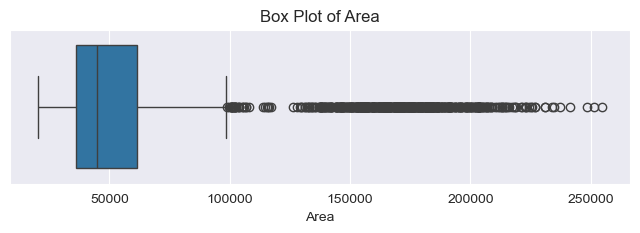

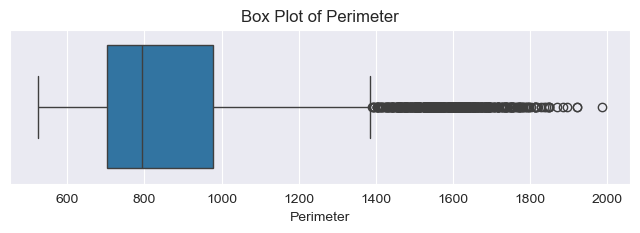

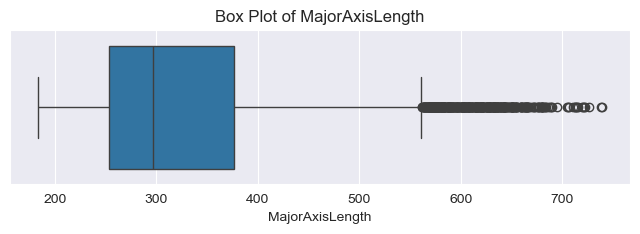

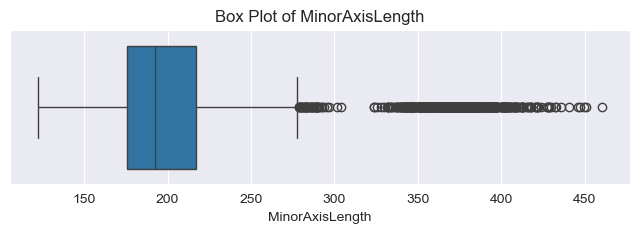

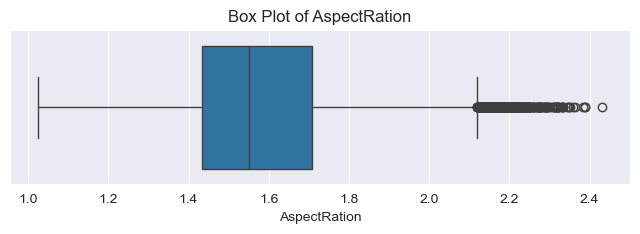

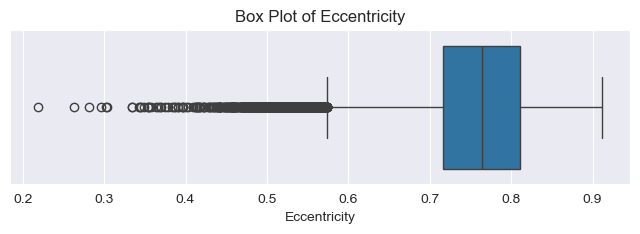

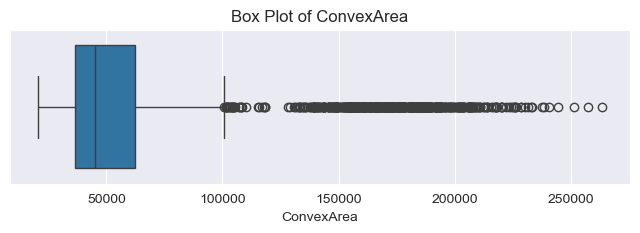

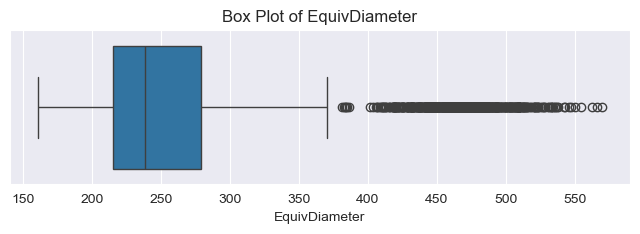

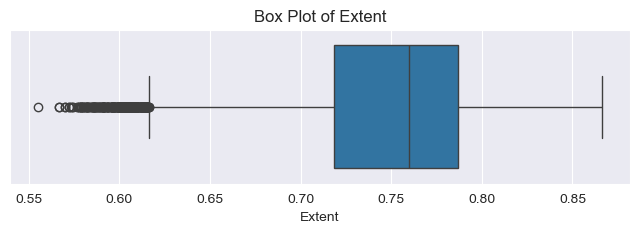

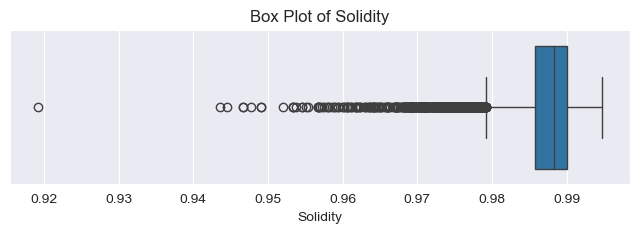

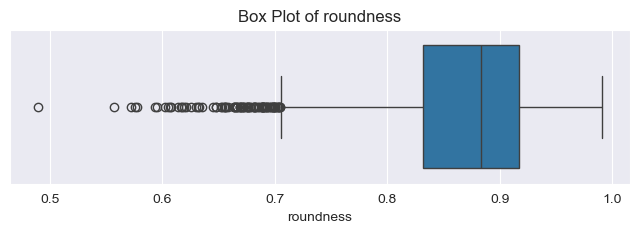

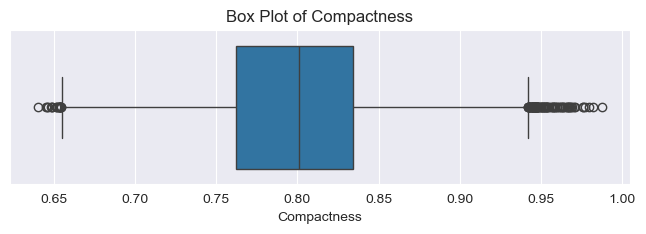

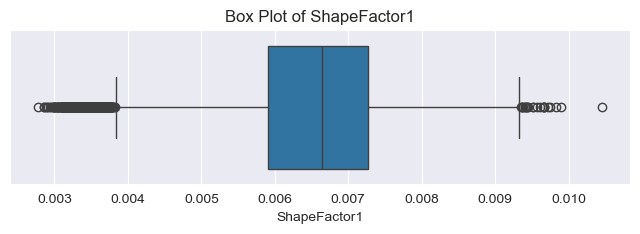

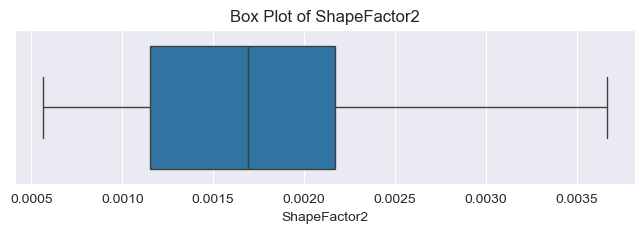

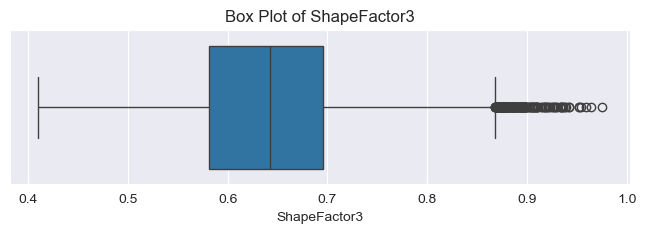

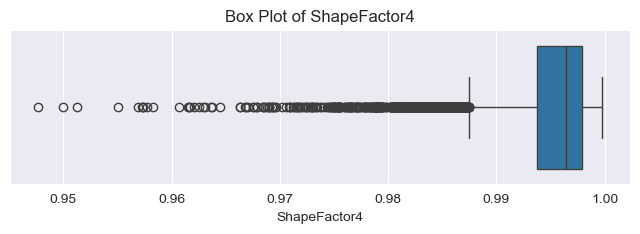

In [11]:
# Outlier Detectionusing Box Plot
for col in num_cols:
  plt.figure(figsize=(8, 2))
  sns.boxplot(data=df, x= col)
  plt.title(f"Box Plot of {col}")

In [12]:
# Detect outlisers in a list
def detect_outliers(values):
  # Find Q1 and Q3
  q1 = np.quantile(values, 0.25)
  q3 = np.quantile(values, 0.75)

  # Find IQR
  iqr = q3 - q1

  # Find lower and upper extreme
  le = q1 - 1.5 * iqr
  ue = q3 + 1.5 * iqr

  # Find ourliers
  lower = values[values < le]
  upper = values[values > ue]

  return list(lower), list(upper)

In [13]:
outlier_cols = []
print("=" * 60)
# Find outliers in each column
for col in num_cols:
  lower, upper = detect_outliers(df[col].values)
  if len(lower) > 0 or len(upper) > 0:
    outlier_cols.append(col)
    print(f"Number of outliers in {col} below lower extreme: {len(lower)}")
    print(f"Number of outliers in {col} above upper extreme: {len(upper)}")
    print("-" * 60)

Number of outliers in Area below lower extreme: 0
Number of outliers in Area above upper extreme: 551
------------------------------------------------------------
Number of outliers in Perimeter below lower extreme: 0
Number of outliers in Perimeter above upper extreme: 500
------------------------------------------------------------
Number of outliers in MajorAxisLength below lower extreme: 0
Number of outliers in MajorAxisLength above upper extreme: 379
------------------------------------------------------------
Number of outliers in MinorAxisLength below lower extreme: 0
Number of outliers in MinorAxisLength above upper extreme: 569
------------------------------------------------------------
Number of outliers in AspectRation below lower extreme: 0
Number of outliers in AspectRation above upper extreme: 473
------------------------------------------------------------
Number of outliers in Eccentricity below lower extreme: 843
Number of outliers in Eccentricity above upper extreme:

## Univariate Analysis

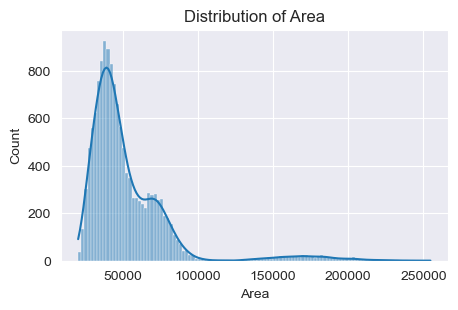

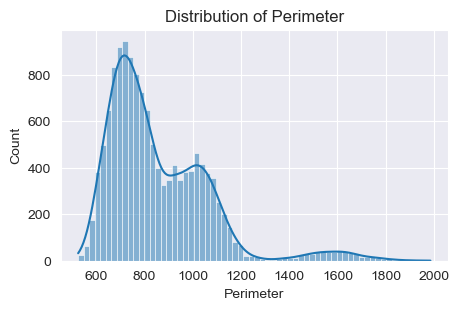

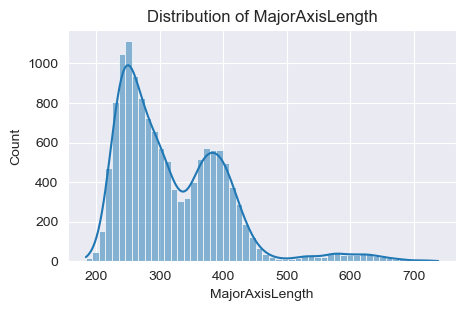

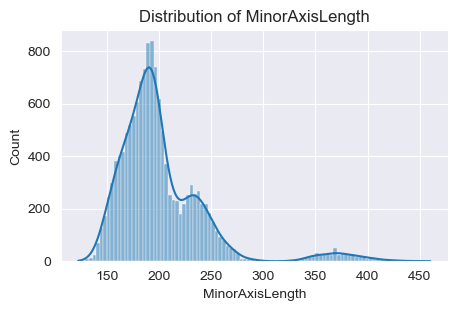

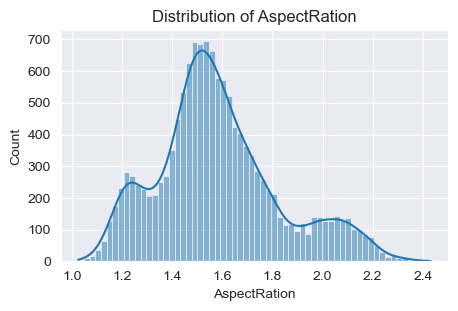

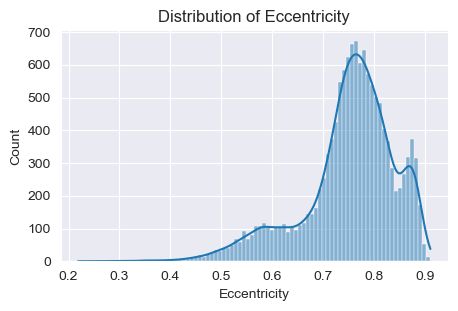

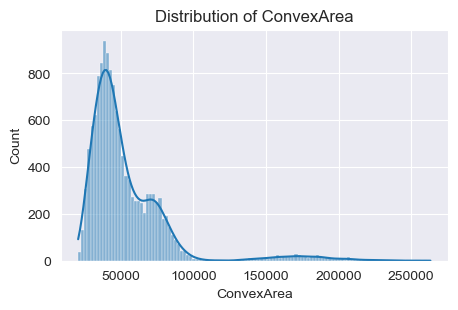

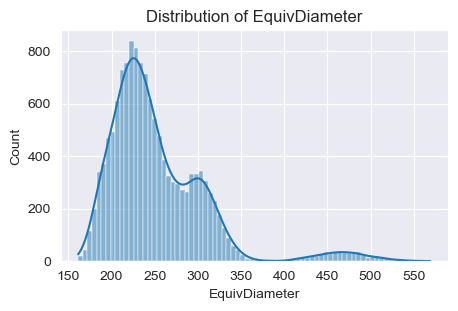

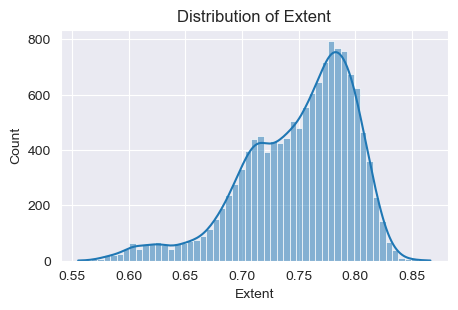

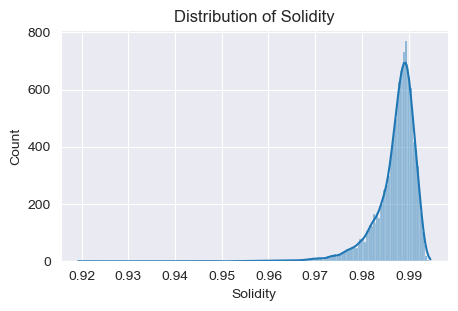

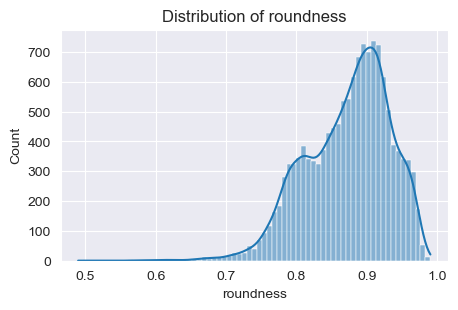

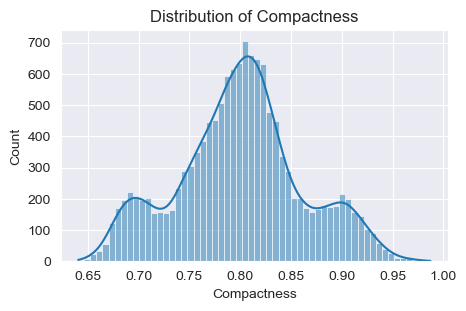

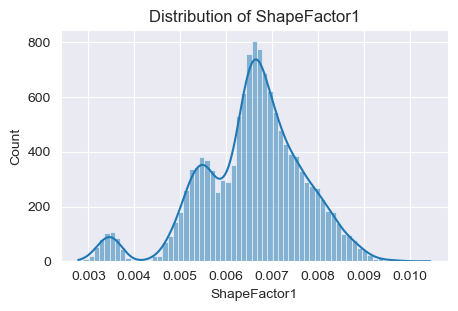

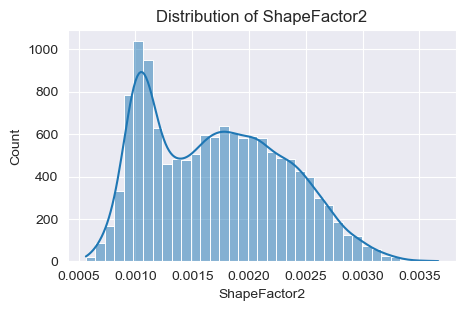

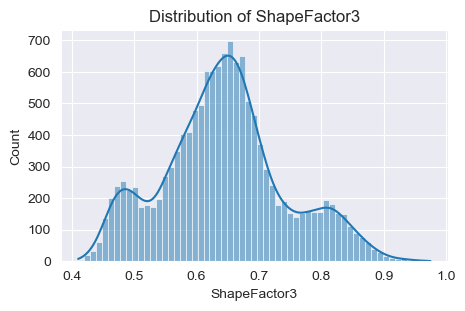

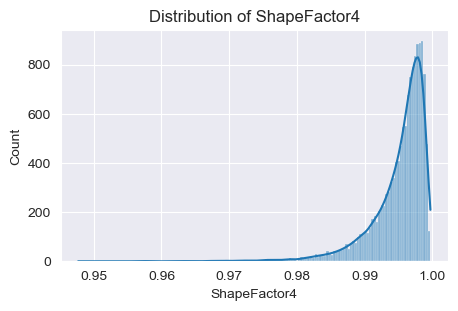

In [14]:
# Distribution of each columns using histogram
for col in num_cols:
  plt.figure(figsize=(5, 3))
  sns.histplot(data= df, x= col, kde=True)
  plt.title(f"Distribution of {col}")

In [15]:
# Number of samples in each class
df["Class"].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

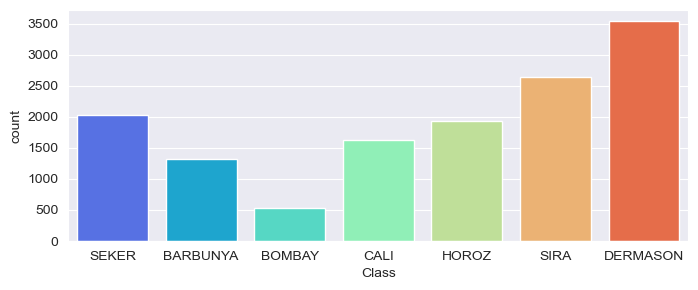

In [16]:
# Visualize it with count plots
plt.figure(figsize=(8, 3))
sns.countplot(data= df, x= "Class", hue= "Class", palette="rainbow")

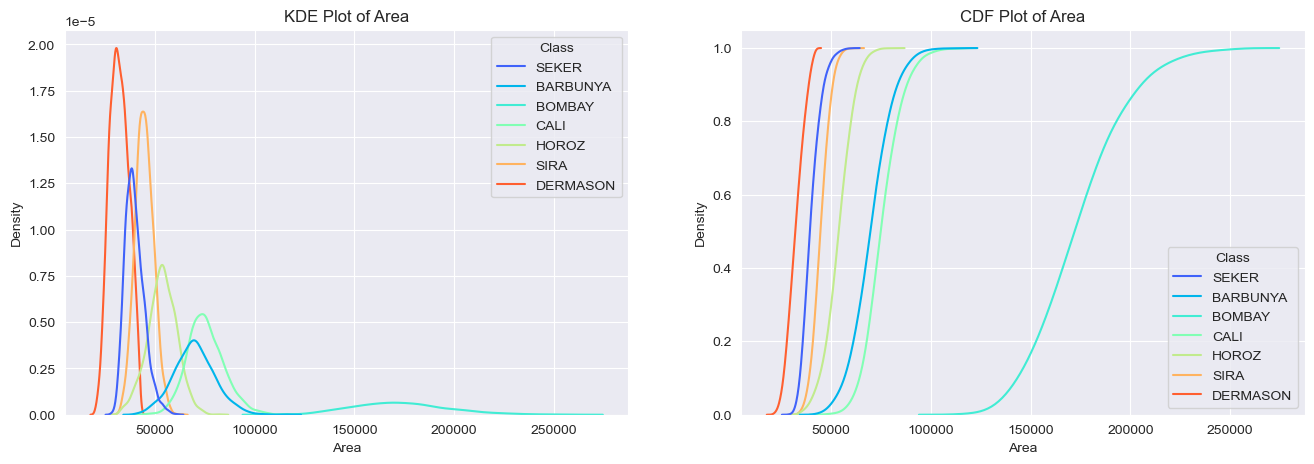

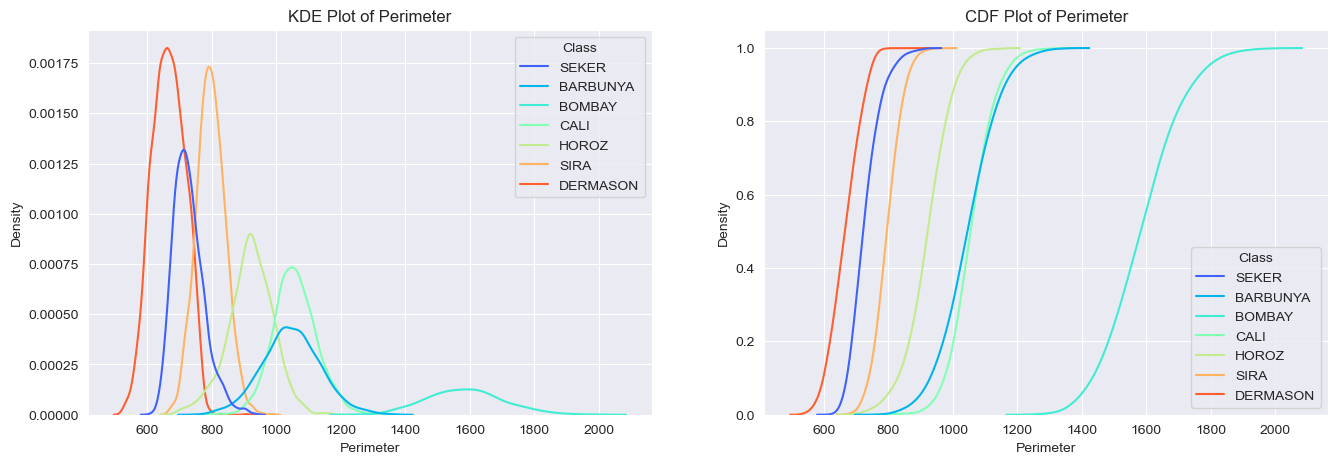

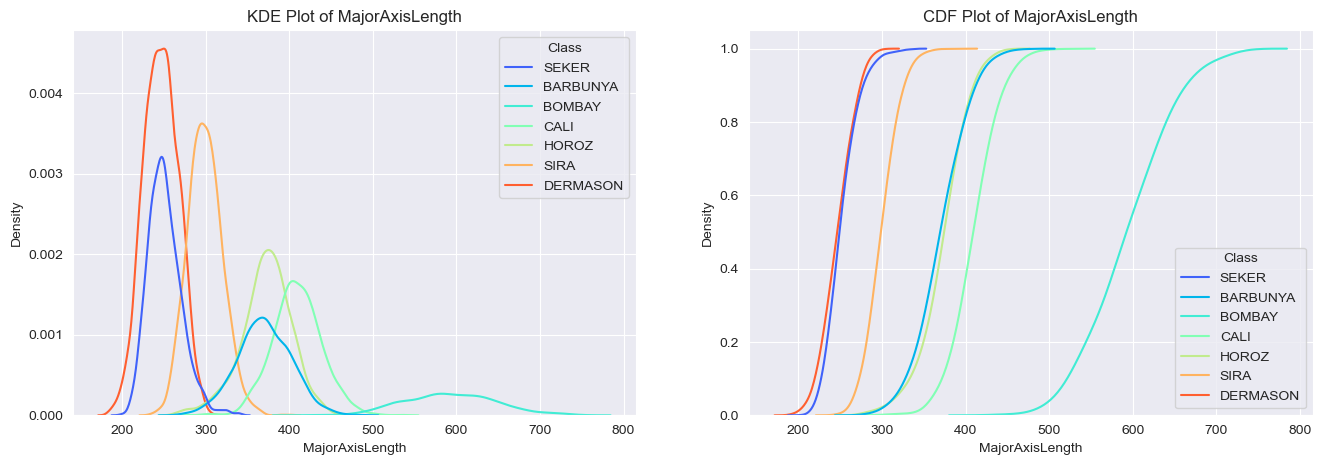

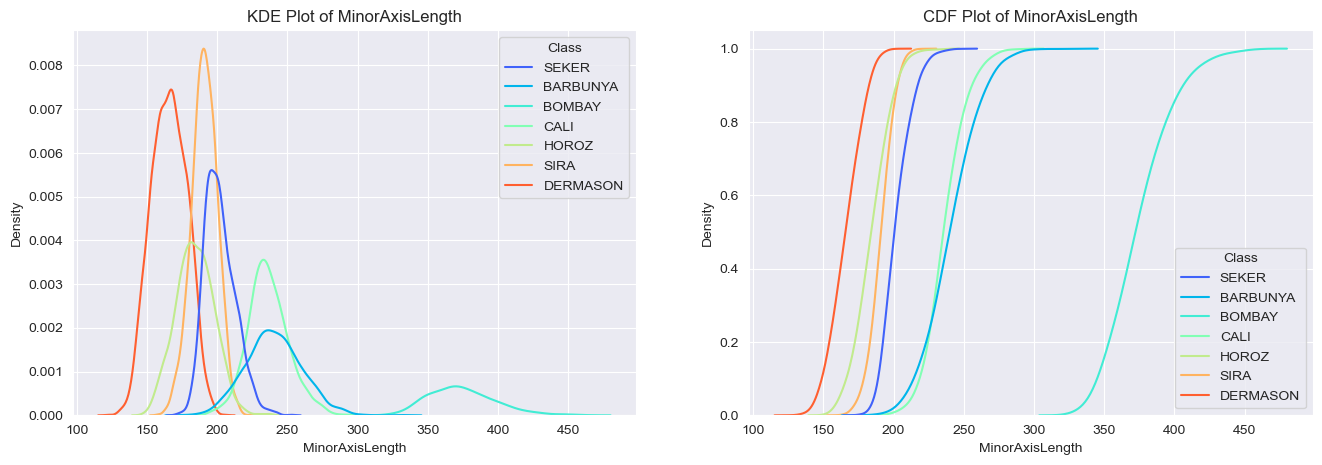

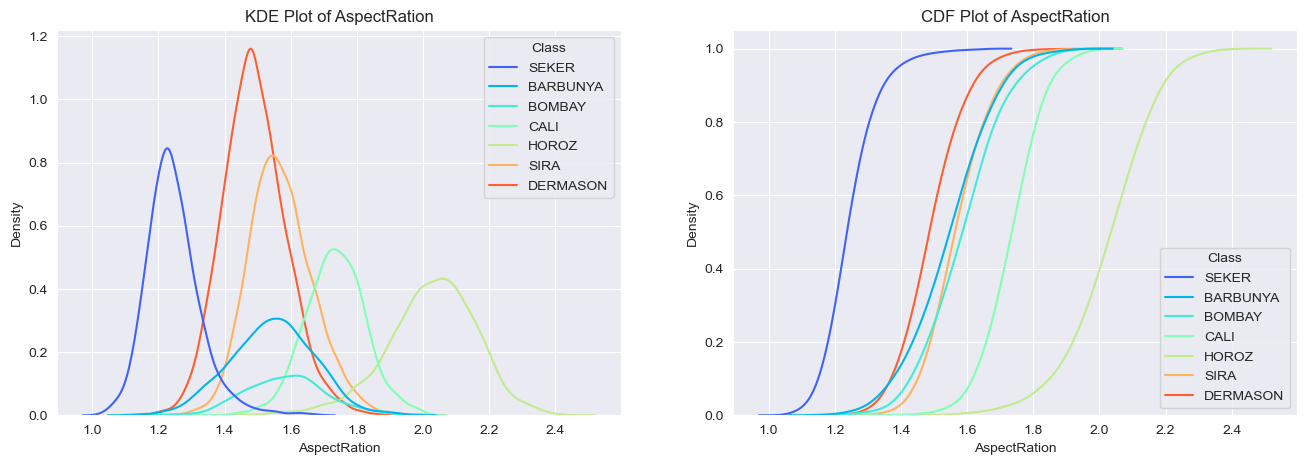

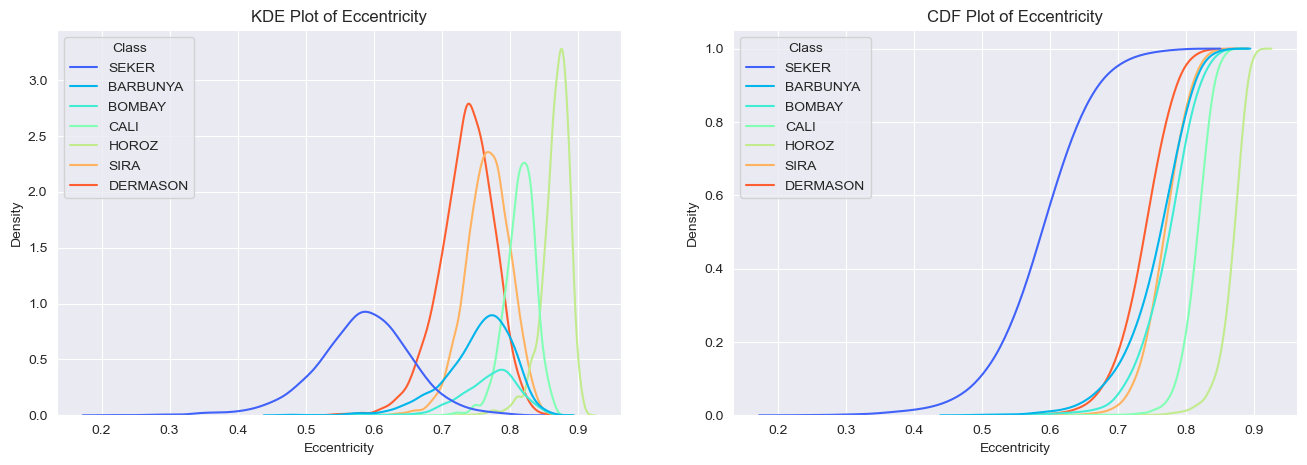

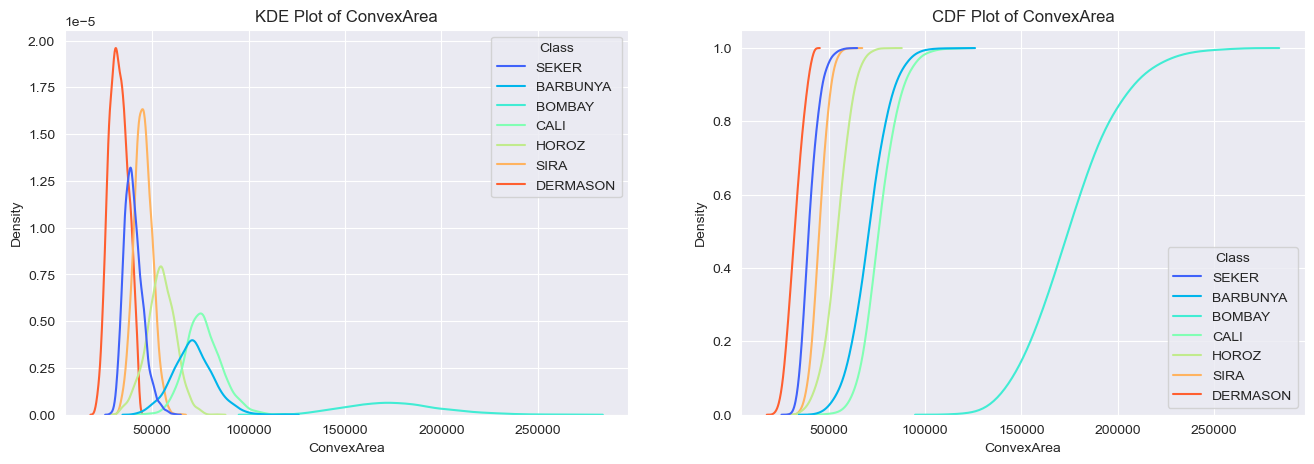

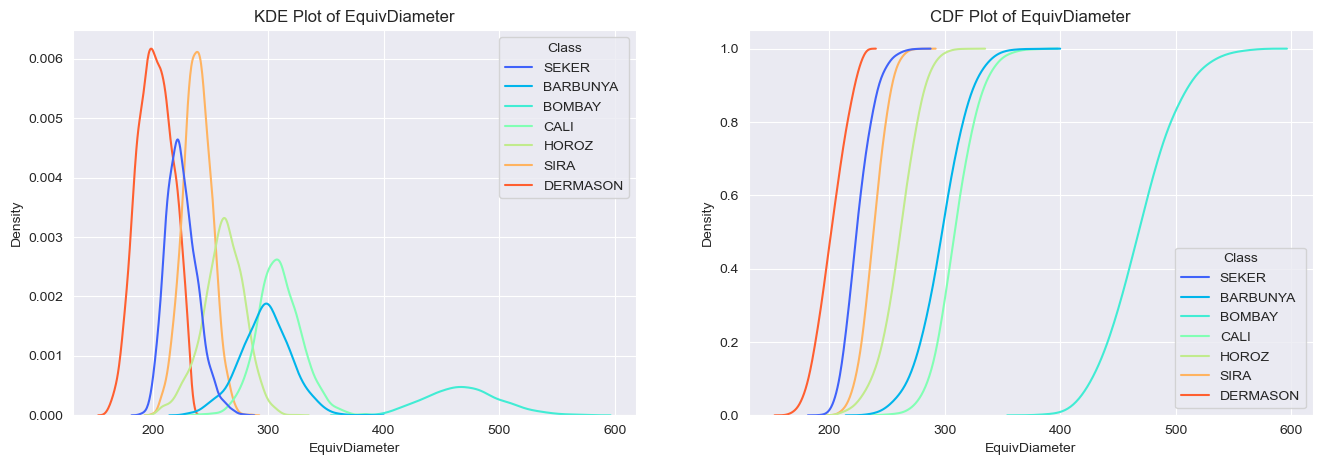

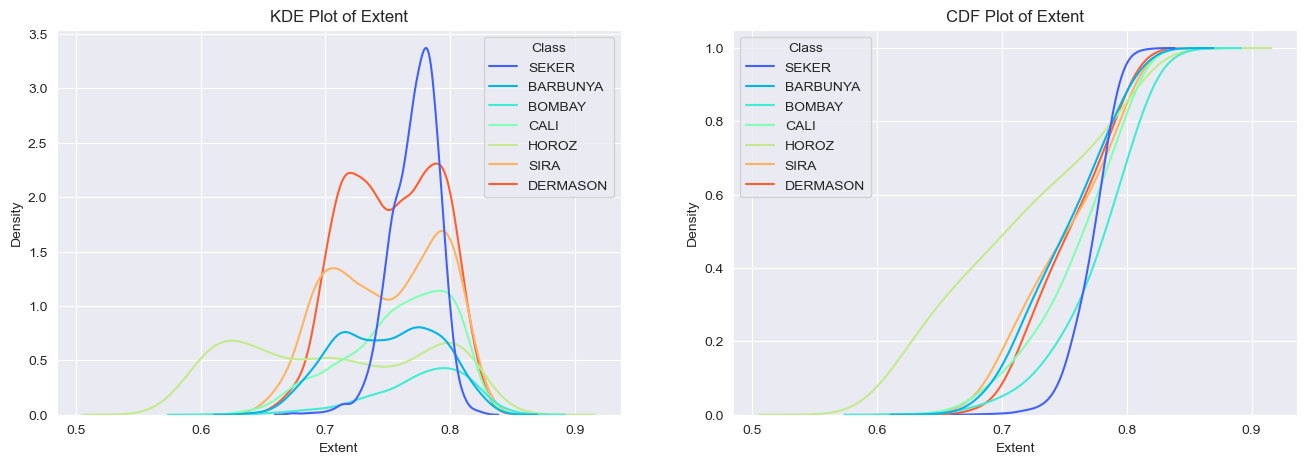

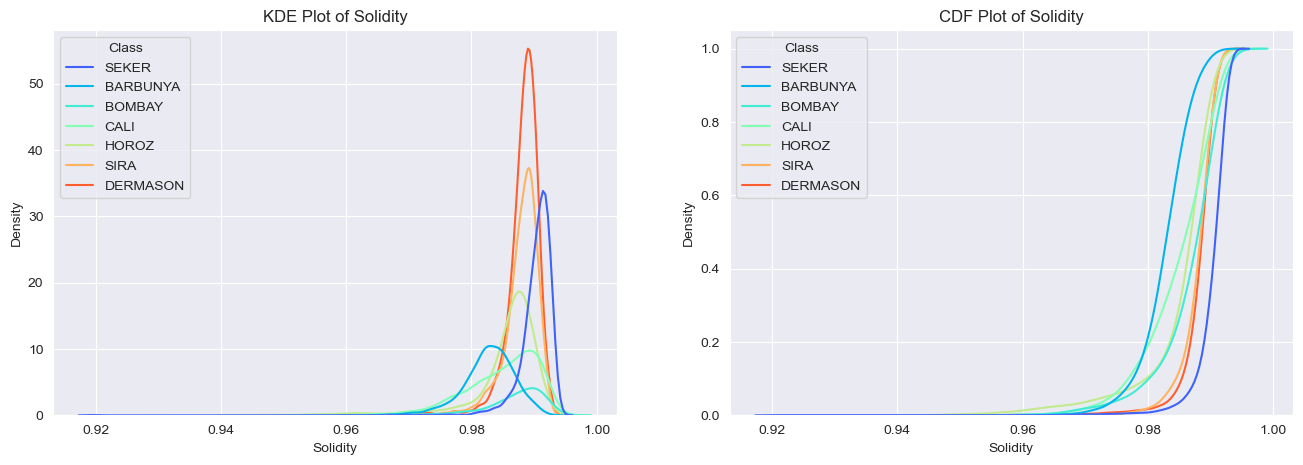

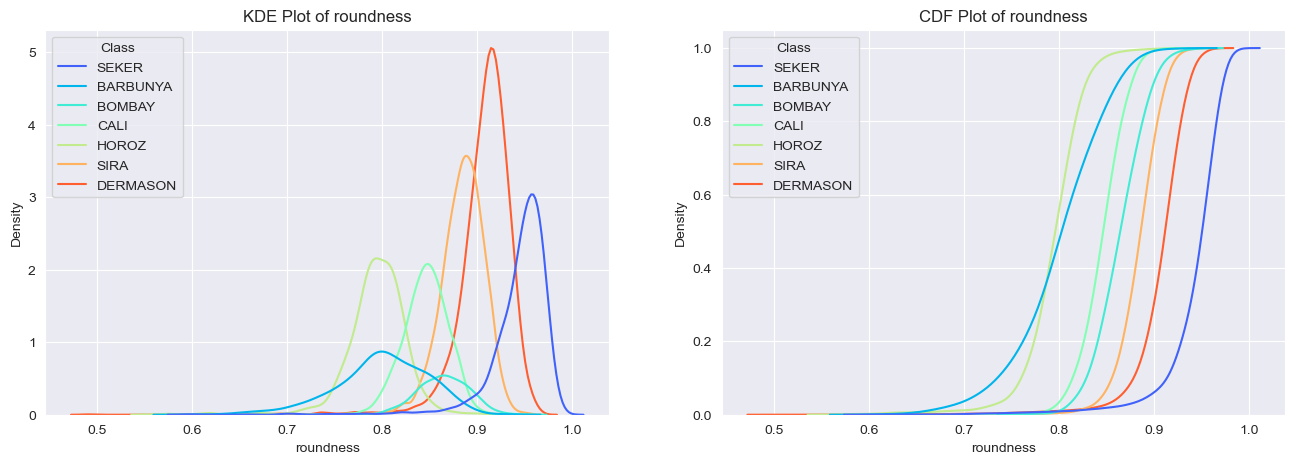

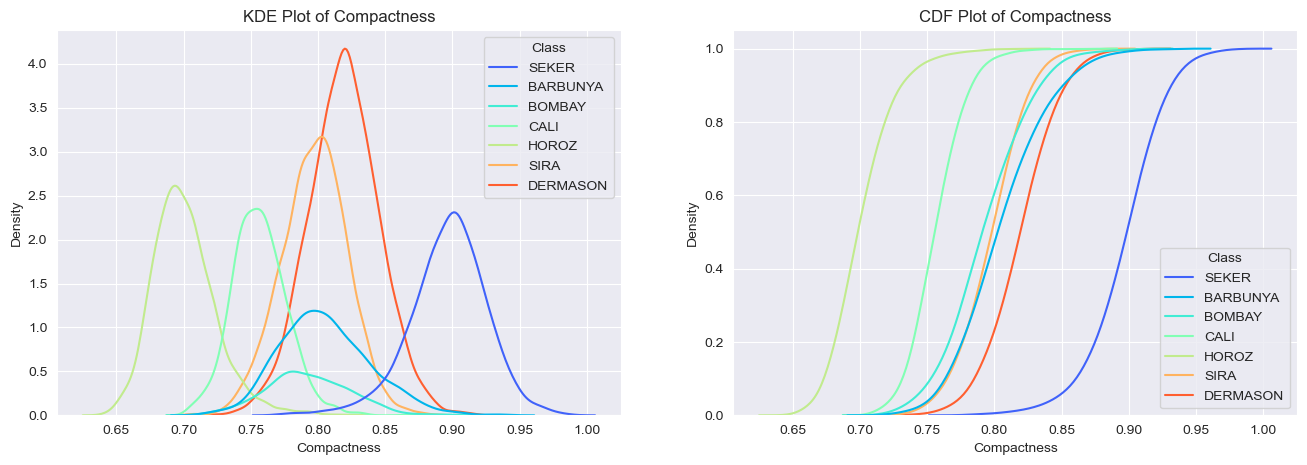

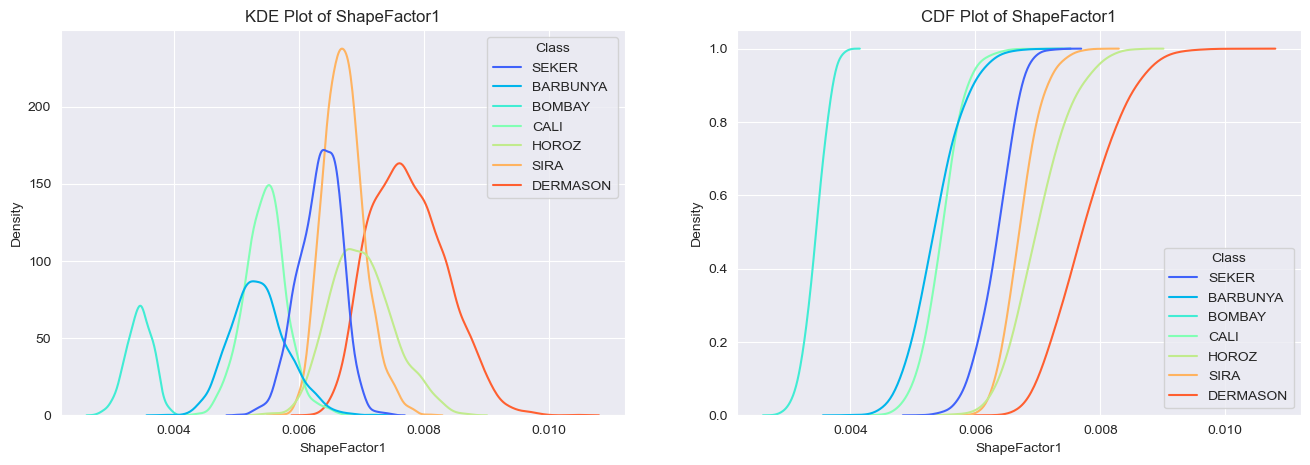

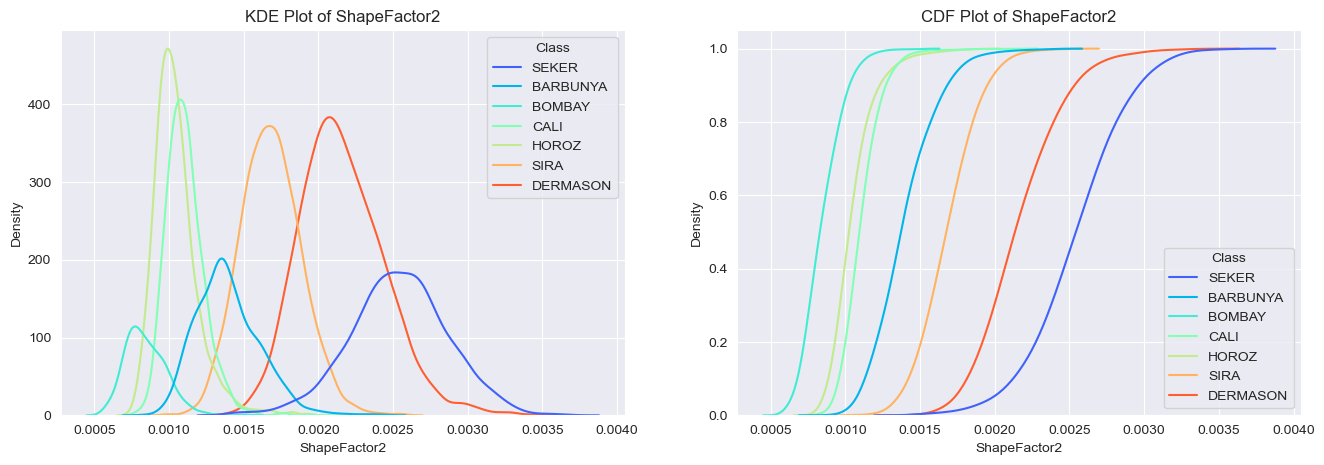

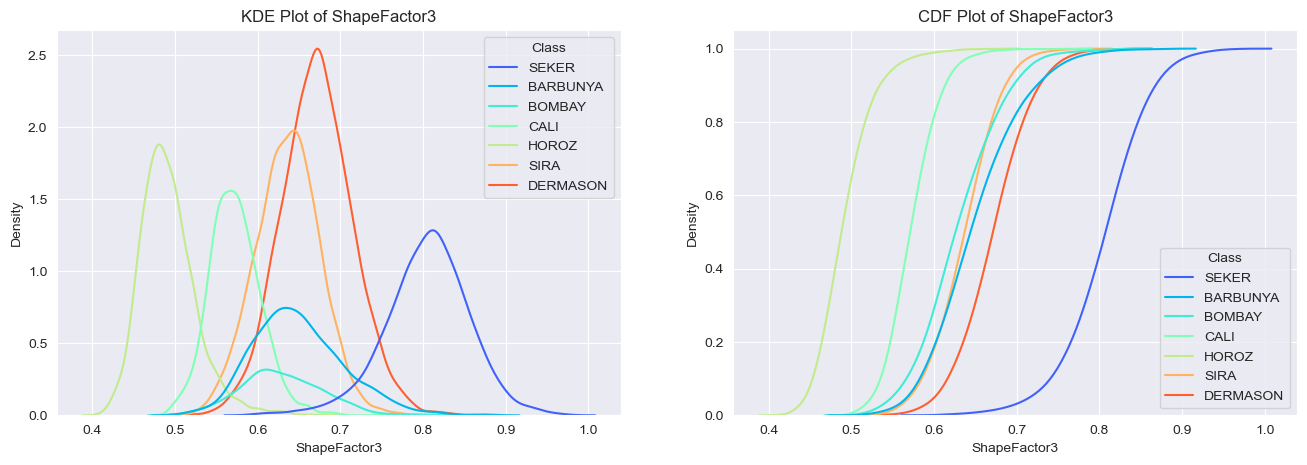

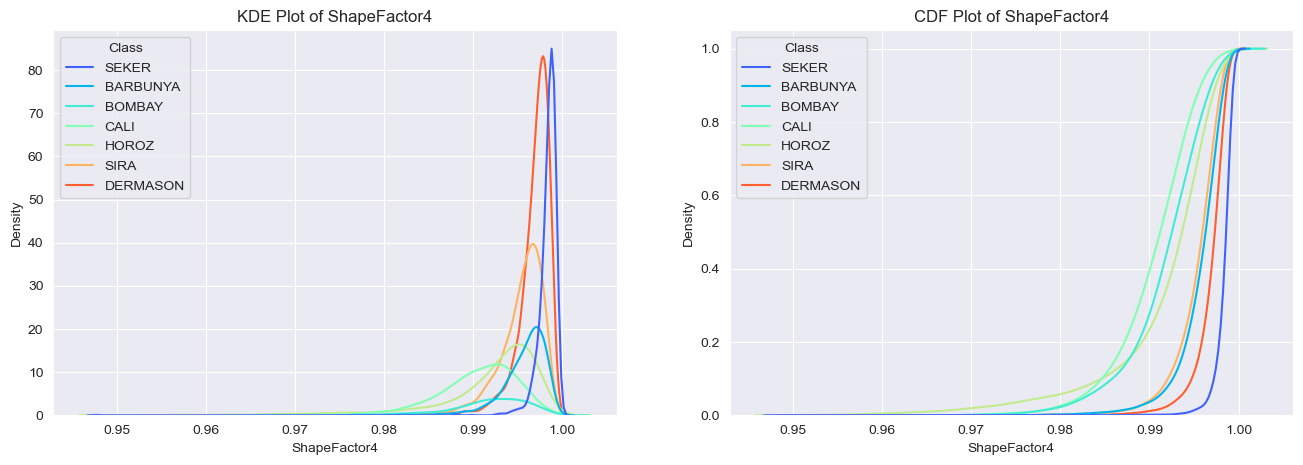

In [17]:
# KDE and CDF plots for numeric features for each class
for col in num_cols:
  fig, axis = plt.subplots(nrows= 1, ncols= 2, figsize=(16,5))

  # KDE Plot
  sns.kdeplot(data=df, x= col, hue="Class", palette= "rainbow", ax= axis[0])
  axis[0].set_title(f"KDE Plot of {col}")

  # CDF Plot
  sns.kdeplot(data= df, x= col, hue= "Class", palette="rainbow", cumulative= True, common_norm= False, ax= axis[1])
  axis[1].set_title(f"CDF Plot of {col}")

## Correlation Analysis

In [18]:
corr = df[num_cols].corr().round(2)
corr

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.98,0.05,-0.20,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36
Perimeter,0.97,1.00,0.98,0.91,0.39,0.39,0.97,0.99,-0.02,-0.30,-0.55,-0.41,-0.86,-0.77,-0.41,-0.43
MajorAxisLength,0.93,0.98,1.00,0.83,0.55,0.54,0.93,0.96,-0.08,-0.28,-0.60,-0.57,-0.77,-0.86,-0.57,-0.48
MinorAxisLength,0.95,0.91,0.83,1.00,-0.01,0.02,0.95,0.95,0.15,-0.16,-0.21,-0.02,-0.95,-0.47,-0.02,-0.26
AspectRation,0.24,0.39,0.55,-0.01,1.00,0.92,0.24,0.30,-0.37,-0.27,-0.77,-0.99,0.02,-0.84,-0.98,-0.45
Eccentricity,0.27,0.39,0.54,0.02,0.92,1.00,0.27,0.32,-0.32,-0.30,-0.72,-0.97,0.02,-0.86,-0.98,-0.45
ConvexArea,1.00,0.97,0.93,0.95,0.24,0.27,1.00,0.99,0.05,-0.21,-0.36,-0.27,-0.85,-0.64,-0.27,-0.36
EquivDiameter,0.98,0.99,0.96,0.95,0.30,0.32,0.99,1.00,0.03,-0.23,-0.44,-0.33,-0.89,-0.71,-0.33,-0.39
Extent,0.05,-0.02,-0.08,0.15,-0.37,-0.32,0.05,0.03,1.00,0.19,0.34,0.35,-0.14,0.24,0.35,0.15
Solidity,-0.20,-0.30,-0.28,-0.16,-0.27,-0.30,-0.21,-0.23,0.19,1.00,0.61,0.30,0.15,0.34,0.31,0.70


<Axes: >

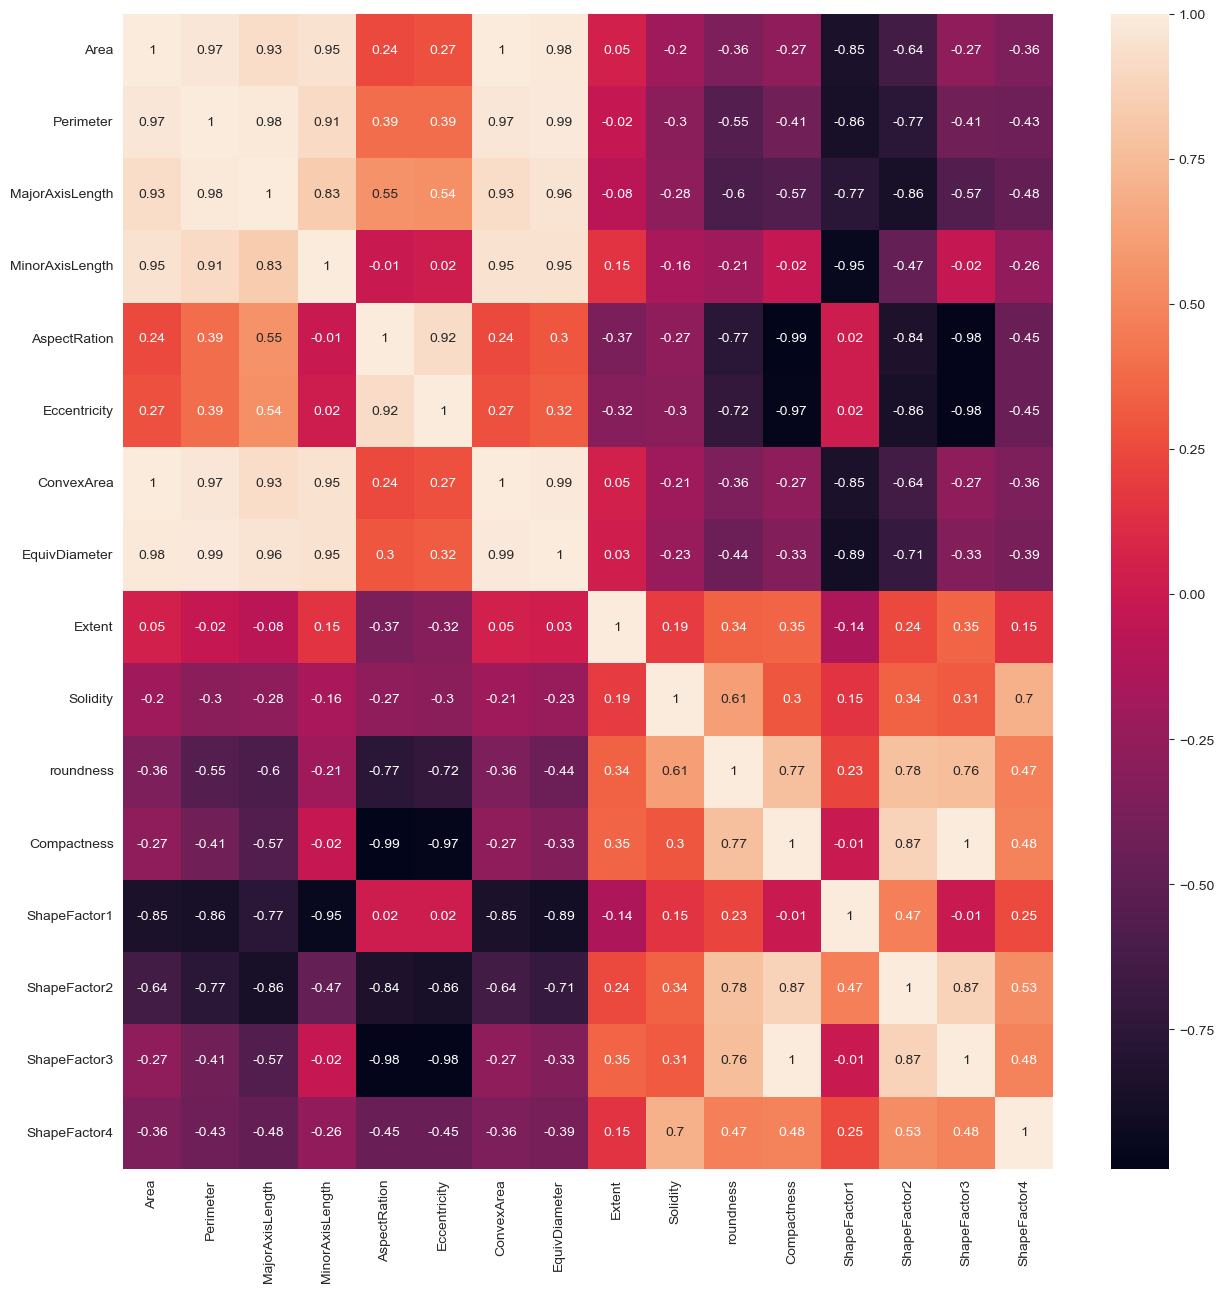

In [19]:
# Visualize correlation using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)

## Insights

#### General Informations

* Number of samples **13611**
* Number of features **17**
* Datatype od all independent features are **numeric**.
* **No missing** values present in any features of sample.
* Most of the numreric columns either has **lower** outliers or **upper** outliers or **both**.

#### Univariate Analysis

* **None** of the features are normally distributed found from histogram analysis.
* From the count plot analysis of **Class** it is found that it is **imbalanced** sample. **BOMBAY** type has lowest number of samples whereas **DERMASON** has the **highest** number of samples.
* From KDE and CDF analysis we fornd that **Area** of all types of beans below **100000** except **BOMBAY** type. Area of most type of beans below 50000.
* From KDE and CDF analysis we fornd that **Perimeter** of all types of beans below **1400** except **BOMBAY** type. Perimeter of most type of beans below 1000.
* From KDE and CDF analysis we fornd that **MajorAxisLength** of all types of beans below **500** except **BOMBAY** type. Major Axis Length of most type of beans below 400.
* From KDE and CDF analysis we fornd that **MinorAxisLength** of all types of beans below **350** except **BOMBAY** type. Minor Axis Length of most type of beans below 300.
* From KDE and CDF analysis we fornd that **Aspectratio** of all types of beans below **1.8** except **HOROZ** type. Aspect Ratio of most type of beans below 2.0.
* From KDE and CDF analysis we fornd that **Eccentricity** of all types of beans above **0.75** except **SEKER** type.
* From KDE and CDF analysis we fornd that **Perimeter** of all types of beans below **100000** except **BOMBAY** type. Perimeter of most type of beans below 50000.
* From KDE and CDF analysis we fornd that **EquivDiameter** of all types of beans below **400** except **BOMBAY** type. Perimeter of most type of beans below 300.

#### Correlation Anlysis

* Some of the independent parameters have highly correlated.